In [4]:
from pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view
from scipy.stats import kurtosis,skew,entropy
import eeglib
import joblib

In [5]:
model= joblib.load("random_forest.joblib")


In [36]:
types=['EEG','EOG','EMG']
exs=['mat','npy']
epochs=[]
for i,type in enumerate(types):
    file_loc="D:/FYP/EEGdenoiseNet-master/EEGdenoiseNet-master/data/{0}_all_epochs.{1}".format(types[i],exs[1])
    data_i=np.load(file_loc)
    if i==0:
        epochs=data_i
    else:
        epochs=np.vstack((epochs,data_i))
        print(epochs.shape)

(7914, 512)
(13512, 512)


Plotting the first 5 waveforms and seeing the predicted label

In [37]:
def hj_mobility(data,axis_=1):
    return np.sqrt(np.var(np.diff(data,axis=axis_),axis=axis_)/np.var(data,axis=axis_))

def hj_complexity(data,axis_=1):
    return hj_mobility(np.diff(data,axis=axis_),axis_=axis_)/hj_mobility(data,axis_=axis_)

def predict_artefact_class(model,data_i):
    #normalise the data_i array
    mu_i=np.mean(data_i,axis=1)
    mu_i=mu_i.reshape(mu_i.shape[0],1)
    sigma_i=np.std(data_i,axis=1)
    sigma_i=sigma_i.reshape(sigma_i.shape[0],1)
    data_i=(data_i-mu_i)/sigma_i

    #mobility
    hj_mob_i=hj_mobility(data_i)
    hj_mob_i=hj_mob_i.reshape(hj_mob_i.shape[0],1)

    #complexity
    hj_comp_i=hj_complexity(data_i)
    hj_comp_i=hj_comp_i.reshape(hj_comp_i.shape[0],1)

    #skew
    skewness_i=skew(data_i,axis=1)**2
    skewness_i=skewness_i.reshape(skewness_i.shape[0],1)

    #kurtosis
    kurtosis_i=kurtosis(data_i,axis=1)**2
    kurtosis_i=kurtosis_i.reshape(kurtosis_i.shape[0],1)
    print(hj_mob_i.shape,skewness_i.shape,kurtosis_i.shape)
    data_i=np.hstack((hj_mob_i,skewness_i,kurtosis_i,hj_comp_i)).T

    #predict
    pred=model.predict(data_i.T)

    return pred

In [38]:
#picking 5 random waves
random_indexes=np.random.randint(0,epochs.shape[0],size=10)
testing_waves=epochs[random_indexes,:]

#testing_waves=epochs[0:5,:]

(10, 1) (10, 1) (10, 1)


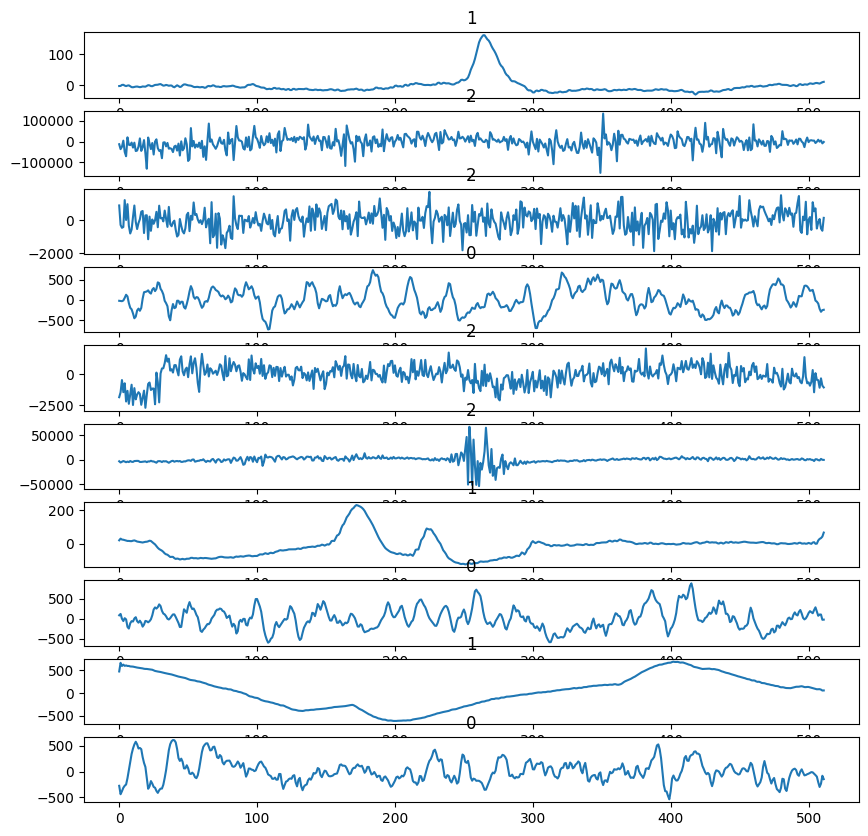

In [39]:
fig,ax=plt.subplots(10,1,figsize=(10,10))
results=predict_artefact_class(model,testing_waves)
for i in range(10):
    ax[i].plot(testing_waves[i,:])
    ax[i].set_title(results[i])
plt.show()